In [17]:
import os
import json
from matplotlib import pyplot as plt

In [81]:
# Search for the available json files in the results folder:
rootdir = "../results/datapoints"

plot_info_files = []
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file.endswith(".json"):
            plot_info_files.append(os.path.join(subdir, file))
    break

# Reading the files and storing the info in a dict: 
all_plot_info = {}
# print("List of run configurations to plot: ")
for file in plot_info_files:
    file_name = file.split("/")[-1].removesuffix('.json')
    # print(" -", file_name)
    with open(file) as json_content:
        all_plot_info[file_name] = json.load(json_content)

print("Inner keys:")
print(" - iterations")
print(" - duality_gap")

Inner keys:
 - iterations
 - duality_gap


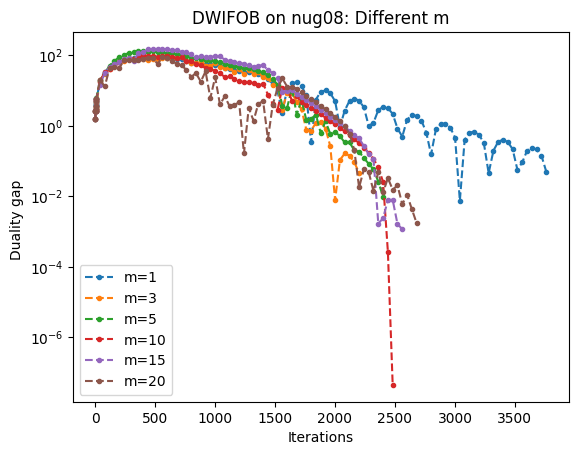

In [70]:
# Plotting an example, different values of m for fast dwifob on the nug08-3rd dataset: 
nug08_m1 = all_plot_info["nug08-3rd_test_fast_dwifob_1e-4_m=1"]
nug08_m3 = all_plot_info["nug08-3rd_test_fast_dwifob_1e-4_m=3"]
nug08_m5 = all_plot_info["nug08-3rd_test_fast_dwifob_1e-4_m=5"]
nug08_m10 = all_plot_info["nug08-3rd_test_fast_dwifob_1e-4_m=10"]
nug08_m15 = all_plot_info["nug08-3rd_test_fast_dwifob_1e-4_m=15"]
nug08_m20 = all_plot_info["nug08-3rd_test_fast_dwifob_1e-4_m=20"]

plt.plot(nug08_m1["iterations"][1:-1], nug08_m1["duality_gap"][1:-1], ".--", label="m=1")
plt.plot(nug08_m3["iterations"][1:-1], nug08_m3["duality_gap"][1:-1], ".--", label="m=3")
plt.plot(nug08_m5["iterations"][1:-1], nug08_m5["duality_gap"][1:-1], ".--", label="m=5")
plt.plot(nug08_m10["iterations"][1:-1], nug08_m10["duality_gap"][1:-1], ".--", label="m=10")
plt.plot(nug08_m15["iterations"][1:-1], nug08_m15["duality_gap"][1:-1], ".--", label="m=15")
plt.plot(nug08_m20["iterations"][1:-1], nug08_m20["duality_gap"][1:-1], ".--", label="m=20")

plt.xlabel("Iterations")
plt.ylabel("Duality gap ")
plt.yscale('log')
plt.title("DWIFOB on nug08: Different m")
plt.legend();

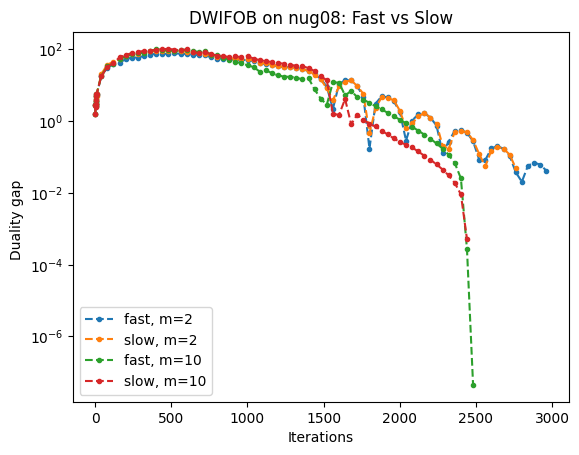

In [71]:
# Comparing the slow and fast versions of dwifob, thay seem to have a small difference: 
# Plotting an example, different values of m for fast dwifob on the nug08-3rd dataset: 
nug08_m2_fast = all_plot_info["nug08-3rd_test_fast_dwifob_1e-4_m=2"]
nug08_m10_fast = all_plot_info["nug08-3rd_test_fast_dwifob_1e-4_m=10"]
nug08_m2_slow = all_plot_info["nug08-3rd_test_slow_dwifob_1e-4_m=2"]
nug08_m10_slow = all_plot_info["nug08-3rd_test_slow_dwifob_1e-4_m=10"]

plt.plot(nug08_m2_fast["iterations"][1:-1], nug08_m2_fast["duality_gap"][1:-1], ".--", label="fast, m=2")
plt.plot(nug08_m2_slow["iterations"][1:-1], nug08_m2_slow["duality_gap"][1:-1], ".--", label="slow, m=2")

plt.plot(nug08_m10_fast["iterations"][1:-1], nug08_m10_fast["duality_gap"][1:-1], ".--", label="fast, m=10")
plt.plot(nug08_m10_slow["iterations"][1:-1], nug08_m10_slow["duality_gap"][1:-1], ".--", label="slow, m=10")

plt.xlabel("Iterations")
plt.ylabel("Duality gap ")
plt.yscale('log')
plt.title("DWIFOB on nug08: Fast vs Slow")
plt.legend();

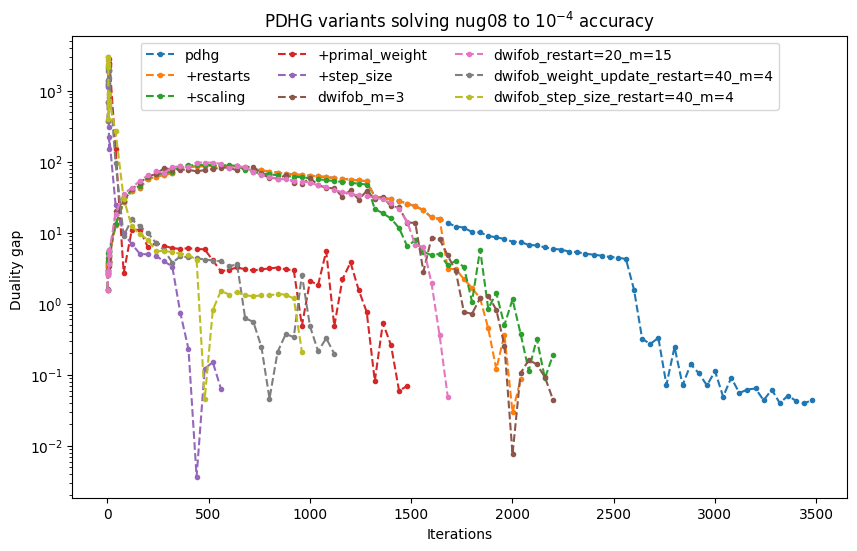

In [ ]:
# Comparing the PDHG variants:
nug08_pdhg = all_plot_info["nug08-3rd_test_pdhg_1e-4"]
nug08_pdhg_restarts = all_plot_info["nug08-3rd_test_+restarts_1e-4"]
nug08_pdhg_scaling = all_plot_info["nug08-3rd_test_+scaling_1e-4"]
nug08_pdhg_primal_weight = all_plot_info["nug08-3rd_test_+primal_weight_1e-4"]
nug08_pdhg_step_size = all_plot_info["nug08-3rd_test_+step_size_1e-4"]

plt.figure(figsize=(10, 6))
plt.plot(nug08_pdhg["iterations"][1:-1], nug08_pdhg["duality_gap"][1:-1], ".--", label="pdhg")
plt.plot(nug08_pdhg_restarts["iterations"][1:-1], nug08_pdhg_restarts["duality_gap"][1:-1], ".--", label="+restarts")
plt.plot(nug08_pdhg_scaling["iterations"][1:-1], nug08_pdhg_scaling["duality_gap"][1:-1], ".--", label="+scaling")
plt.plot(nug08_pdhg_primal_weight["iterations"][1:-1], nug08_pdhg_primal_weight["duality_gap"][1:-1], ".--", label="+primal_weight")
plt.plot(nug08_pdhg_step_size["iterations"][1:-1], nug08_pdhg_step_size["duality_gap"][1:-1], ".--", label="+step_size")

# Plotting the best version of dwifob as well: 
nug08_dwifob_m3 = all_plot_info["nug08-3rd_test_fast_dwifob_1e-4_m=3"]
plt.plot(nug08_dwifob_m3["iterations"][1:-1], nug08_dwifob_m3["duality_gap"][1:-1], ".--", label="dwifob_m=3")

# Adding the one with restarts=20 and m=15
nug08_dwifob_restart20_m15 = all_plot_info["nug08-3rd_test_restarts=20_fast_+restarts_1e-4_m=15"]
plt.plot(nug08_dwifob_restart20_m15["iterations"][1:-1], nug08_dwifob_restart20_m15["duality_gap"][1:-1], ".--", label="dwifob_restart=20_m=15")

# Adding primal weight update with restarts=40 and m=4
nug08_dwifob_weight_update_restart40_m4 = all_plot_info["nug08-3rd_test_+primal_weight_restart=40_1e-4_m=4"]
plt.plot(nug08_dwifob_weight_update_restart40_m4["iterations"][1:-1], nug08_dwifob_weight_update_restart40_m4["duality_gap"][1:-1], ".--", label="dwifob_weight_update_restart=40_m=4")

# Adding slow dwifob with "my modified adaptive stepsize"
nug08_slow_dwifob_step_size_restart40_m4 = all_plot_info["nug08-3rd_test_slow_+step_size_restart=40_1e-4_m=4"]
plt.plot(nug08_slow_dwifob_step_size_restart40_m4["iterations"][1:-1], nug08_slow_dwifob_step_size_restart40_m4["duality_gap"][1:-1], ".--", label="slow_dwifob_step_size_restart=40_m=4")

plt.xlabel("Iterations") 
plt.ylabel("Duality gap ")
plt.yscale('log')
plt.title("PDHG variants solving nug08 to $10^{-4}$ accuracy")
plt.legend(loc="upper center", ncol=3);
